In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
nnfs.init()

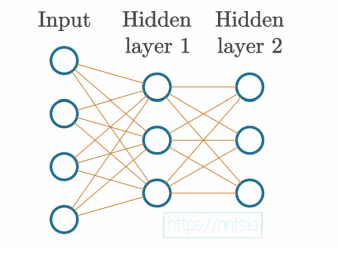

In [2]:
inputs = np.array([[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]])

weights = np.array([[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = [2, 3, 0.5]

weights2 = np.array([[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]])

biases2 = [-1, 2, -0.5]

print('layer1_output is the input to layer2\n')

layer1_output= np.dot(inputs, weights.T) + biases
print(layer1_output)
print(f'shape = {layer1_output.shape}')

print('\n')

layer2_output= np.dot(layer1_output, weights2.T) + biases2
print(layer2_output)
print(f'shape = {layer2_output.shape}')

layer1_output is the input to layer2

[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]
shape = (3, 3)


[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]
shape = (3, 3)


In [3]:
# how to utilize weights?

n_features= 2
n_neurons= 4
weights= np.random.randn(n_features, n_neurons)
weights

array([[ 1.7640524 ,  0.4001572 ,  0.978738  ,  2.2408931 ],
       [ 1.867558  , -0.9772779 ,  0.95008844, -0.1513572 ]],
      dtype=float32)

In [4]:
class LayerDense:

    def __init__(self, n_inputs, n_neurons):
        self.weight = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.bias = np.zeros(shape= (1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weight) + self.bias

from nnfs.datasets import spiral_data
# create a spiral data with 3 classes, each with 100 samples
X, y = spiral_data(samples = 100, classes = 3)

X.shape, y.shape

((300, 2), (300,))

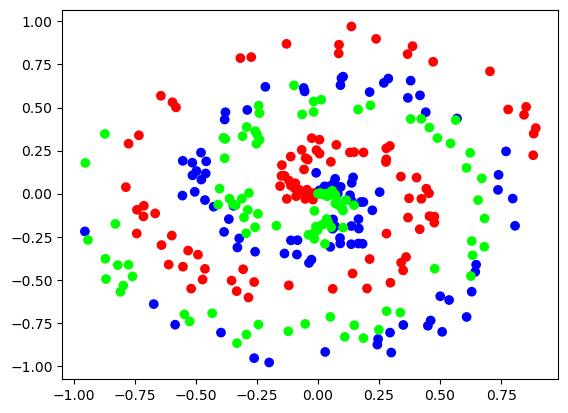

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'brg')

In [6]:
X.shape, y.shape

((300, 2), (300,))

In [7]:
n_features = X.shape[1]
n_samples = X.shape[0]

dense1 = LayerDense(n_inputs = n_features, n_neurons = 3)
dense1.forward(X)

print(dense1.output[:5])
print(f'shape = {dense1.output.shape}')

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.24927217e-04 -1.13383176e-04 -7.44427671e-05]
 [ 2.47531279e-04 -2.27871249e-04 -1.49413201e-04]
 [ 3.48339119e-04 -2.17201712e-04 -1.48695675e-04]
 [ 5.06213692e-04 -3.67755594e-04 -2.47095915e-04]]
shape = (300, 3)


- `[sample1_neuron1, sample1_neuron2, sample1_neuron3]`
- `[sample2_neuron1, sample2_neuron2, sample2_neuron3]`
- `[sample3_neuron1, sample3_neuron2, sample3_neuron3]`
- etc
- `[sample300_neuron1, sample300_neuron2, sample300_neuron3]`

In [8]:
dense1.weight

array([[ 0.00693773, -0.00159573, -0.00133702],
       [ 0.01077744, -0.01126826, -0.00730678]], dtype=float32)

- `[weight1_neuron1, weight1_neuron2, weight1_neuron3]`
- `[weight2_neuron1, weight2_neuron2, weight2_neuron3]`

In [9]:
dense1.bias

array([[0., 0., 0.]], dtype=float32)

In [17]:
class LayerDense:

    def __init__(self, n_inputs, n_neurons):
        self.weights= 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases= np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output= np.dot(inputs, self.weights) + self.biases

class ActivationReLU:

    def forward(self, inputs):
        self.output= np.maximum(0, inputs)

class ActivationSoftmax:

    def forward(self, inputs):
        # unnormalized proba
        exps= np.exp(inputs - np.max(inputs, axis= 1, keepdims= True))    
        # normalized proba
        proba= exps / np.sum(exps, axis= 1, keepdims= True)
        self.output= proba

In [19]:
X, y= spiral_data(samples= 100, classes= 3)

# dense layer 1
dense1= LayerDense(n_inputs= 2, n_neurons= 3)
activation1= ActivationReLU()

# dense layer 2
dense2= LayerDense(n_inputs= 3, n_neurons= 3)
activation2= ActivationSoftmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

activation2.output[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333337, 0.33333334, 0.33333325],
       [0.3333334 , 0.3333333 , 0.33333325],
       [0.33333346, 0.33333334, 0.3333332 ],
       [0.3333335 , 0.33333334, 0.33333316]], dtype=float32)

Our model have not learn, therefore it outputs the same proba for all classes.